In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl

In [192]:
Mexico=pd.read_csv('Datos_limpios_Mexico_andi.csv')

In [193]:
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      26582 non-null  int64  
 1   last_scraped                    26582 non-null  object 
 2   source                          26582 non-null  object 
 3   name                            26582 non-null  object 
 4   description                     26582 non-null  object 
 5   host_name                       26582 non-null  object 
 6   host_since                      26582 non-null  object 
 7   host_location                   26582 non-null  object 
 8   host_about                      26582 non-null  object 
 9   host_response_time              26582 non-null  object 
 10  host_response_rate              26582 non-null  object 
 11  host_acceptance_rate            26582 non-null  object 
 12  host_is_superhost               

In [194]:
Mexico.head()

,Unnamed: 0,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,0,25/09/24,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,28/06/10,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,1.0,1.20
1,1,26/09/24,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,09/08/10,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,8.0,0.41
2,2,26/09/24,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,04/01/11,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within an hour,...,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.31
3,3,25/09/24,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,24/08/10,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,...,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,3.0,0.83
4,4,25/09/24,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,27/04/11,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,within an hour,...,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,3.0,0.11


In [195]:
Mexico=Mexico.drop(columns='Unnamed: 0')
Mexico

,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,25/09/24,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,28/06/10,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,0%,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,1.0,1.20
1,26/09/24,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,09/08/10,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,100%,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,8.0,0.41
2,26/09/24,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,04/01/11,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within an hour,71%,...,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.31
3,25/09/24,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,24/08/10,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,100%,...,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,3.0,0.83
4,25/09/24,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,27/04/11,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,within an hour,100%,...,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,3.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,25/09/24,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,HostPal,16/04/16,"Mexico City, Mexico","I am a social person, who likes to provide the...",within an hour,100%,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,4.9,1.20
26578,25/09/24,city scrape,Suite King | District Polanco,This spacious room features a plush king-size ...,Luis Angel,13/08/24,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",within an hour,100%,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,16.0,1.20
26579,25/09/24,city scrape,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,Luis Angel,13/08/24,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",within an hour,100%,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,16.0,1.20
26580,25/09/24,city scrape,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,Luis Angel,13/08/24,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",within an hour,100%,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,16.0,1.20


In [196]:
Mexico.head()

,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,25/09/24,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,28/06/10,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,0%,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,1.0,1.20
1,26/09/24,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,09/08/10,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,100%,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,8.0,0.41
2,26/09/24,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,04/01/11,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within an hour,71%,...,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.31
3,25/09/24,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,24/08/10,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,100%,...,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,3.0,0.83
4,25/09/24,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,27/04/11,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,within an hour,100%,...,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,3.0,0.11


In [197]:
#Obtengo un analisis univariado de las variables categorias
# “availability_365”* , “number_of_reviews”, “review_scores_location”,  
# “review_scores_value”, “reviews_per_month”, “review_scores_communication”, 
# “review_scores_checkin”, “review_scores_cleanliness”, “review_scores_accuracy”
freq_tbl(Mexico)

  last_scraped  frequency  percentage  cumulative_perc
0     25/09/24      15745    0.592318         0.592318
1     26/09/24      10837    0.407682         1.000000

----------------------------------------------------------------

            source  frequency  percentage  cumulative_perc
0      city scrape      23671     0.89049          0.89049
1  previous scrape       2911     0.10951          1.00000

----------------------------------------------------------------

                                                    name  frequency  \
0         Blueground | Roma Sur 1 recamara, AC & rooftop         57   
1                          Blueground | Polanco, parking         49   
2                       Perfecto Loft en gran ubicaci√≥n         48   
3      Blueground | Amueblado, Security & Business Ce...         36   
4                               Casa Miravalle | Condesa         21   
...                                                  ...        ...   
25163  Private suite in Con

In [8]:
Mexico["availability_365"].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
26582 non-null  int64
dtypes: int64(1)
memory usage: 207.8 KB


In [10]:
#Obtenemos limite superior e inferior
Max_365= Mexico["availability_365"]. max()
Min_365= Mexico["availability_365"]. min()
Limites_365=[Min_365, Max_365]
Limites_365

[0, 365]

In [11]:
#Calculamos el RANGO
R_365= Max_365-Min_365
R_365

365

In [12]:
#Calculamos el numero de intervalos de clase
ni_365= 1+3.32*np.log10(n)
ni_365

15.689631010177528

In [13]:
#Calculamos el ancho de los intervalos
i_365= R_365/ni_365
i_365

23.263772090193346

In [14]:
#Categorizacion de variables
intervalos_365=np.linspace(Min_365, Max_365, 16)
intervalos_365

array([  0.        ,  24.33333333,  48.66666667,  73.        ,
        97.33333333, 121.66666667, 146.        , 170.33333333,
       194.66666667, 219.        , 243.33333333, 267.66666667,
       292.        , 316.33333333, 340.66666667, 365.        ])

In [15]:
#Creamos las categorias
categorias_365= ["Categoria 1", "Categoria 2", "Categoria 3", 
                 "Categoria 4", "Categoria 5", "Categoria 6", 
                 "Categoria 7", "Categoria 8", "Categoria 9",
                 "Categoria 10", "Categoria 11","Categoria 12",
                 "Categoria 13", "Categoria 14", "Categoria 15"]

In [16]:
#Finalmente creamos las categorias en la columna numerica
Mexico["availability_365"]= pd.cut(x=Mexico["availability_365"], bins=intervalos_365, labels=categorias_365)
Mexico["availability_365"]

0        Categoria 15
1        Categoria 14
2        Categoria 14
3        Categoria 11
4        Categoria 12
             ...     
26577    Categoria 15
26578     Categoria 8
26579     Categoria 8
26580     Categoria 8
26581     Categoria 7
Name: availability_365, Length: 26582, dtype: category
Categories (15, object): ['Categoria 1' < 'Categoria 2' < 'Categoria 3' < 'Categoria 4' ... 'Categoria 12' < 'Categoria 13' < 'Categoria 14' < 'Categoria 15']

In [17]:
#obtengo analisis univariado de una variable categorica en especifico   

table_365=freq_tbl(Mexico["availability_365"])
table_365

,availability_365,frequency,percentage,cumulative_perc
0,Categoria 15,6605,0.248476,0.272686
1,Categoria 14,2815,0.105899,0.388903
2,Categoria 11,1977,0.074374,0.470523
3,Categoria 4,1692,0.063652,0.540377
4,Categoria 12,1570,0.059063,0.605194
5,Categoria 13,1436,0.054022,0.664479
6,Categoria 3,1236,0.046498,0.715507
7,Categoria 7,1122,0.042209,0.761828
8,Categoria 8,1089,0.040968,0.806787
9,Categoria 10,1052,0.039576,0.850219


In [18]:
#elimino las columnas ppercentage y cumulative perc para trabajar con las frecuencias
table_365= table_365.drop(["percentage","cumulative_perc"],axis=1)
table_365

,availability_365,frequency
0,Categoria 15,6605
1,Categoria 14,2815
2,Categoria 11,1977
3,Categoria 4,1692
4,Categoria 12,1570
5,Categoria 13,1436
6,Categoria 3,1236
7,Categoria 7,1122
8,Categoria 8,1089
9,Categoria 10,1052


In [42]:
#ajusto indice de mi dataframe
table_365_index= table_365.set_index('availability_365')
table_365_index

,frequency
availability_365,
Categoria 15,6605
Categoria 14,2815
Categoria 11,1977
Categoria 4,1692
Categoria 12,1570
Categoria 13,1436
Categoria 3,1236
Categoria 7,1122
Categoria 8,1089


Text(0, 0.5, 'Frecuencia')

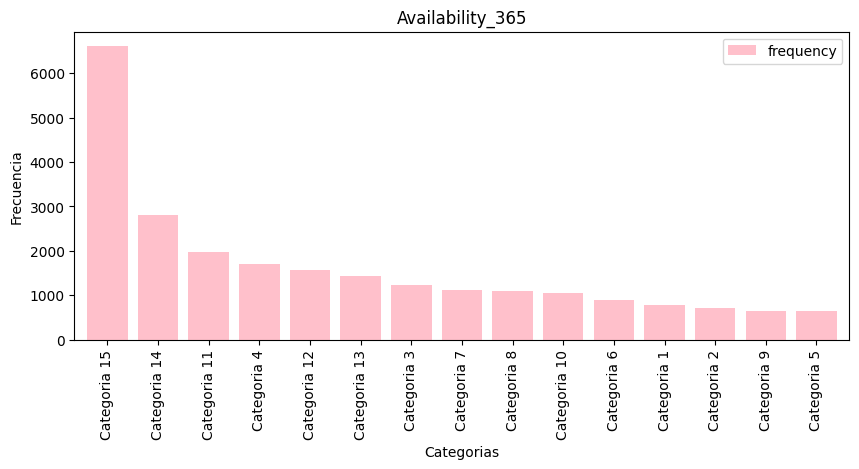

In [44]:
table_365_index.plot(kind="bar", width=0.8, figsize=(10,4), color= "pink")
plt.title("Availability_365")
plt.xlabel("Categorias")
plt.ylabel("Frecuencia")

“number_of_reviews”

In [ ]:
Mexico["number_of_reviews_"].info()
n=26582

“review_scores_location”

In [52]:
Mexico["review_scores_location"].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_location
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [53]:
#Obtenemos limite superior e inferior
Max_scores= Mexico["review_scores_location"]. max()
Min_scores= Mexico["review_scores_location"]. min()
Limites_scores=[Min_scores, Max_scores]
Limites_scores

[4.58, 5.0]

In [54]:
#Calculamos el RANGO
R_scores= Max_scores-Min_scores
R_scores


0.41999999999999993

In [55]:

#Calculamos el numero de intervalos de clase
ni_scores= 1+3.32*np.log10(n)
ni_scores

15.689631010177528

In [56]:

#Calculamos el ancho de los intervalos
i_scores= R_scores/ni_scores
i_scores

0.026769271994195078

In [57]:

#Categorizacion de variables
intervalos_scores=np.linspace(Min_scores, Max_scores, 16)
intervalos_scores

array([4.58 , 4.608, 4.636, 4.664, 4.692, 4.72 , 4.748, 4.776, 4.804,
       4.832, 4.86 , 4.888, 4.916, 4.944, 4.972, 5.   ])

In [58]:
#Creamos las categorias
categorias_scores= ["Categoria 1", "Categoria 2", "Categoria 3", 
                 "Categoria 4", "Categoria 5", "Categoria 6", 
                 "Categoria 7", "Categoria 8", "Categoria 9",
                 "Categoria 10", "Categoria 11","Categoria 12",
                 "Categoria 13", "Categoria 14", "Categoria 15"]

In [59]:
#Finalmente creamos las categorias en la columna numerica
Mexico["review_scores_location"]= pd.cut(x=Mexico["review_scores_location"], bins=intervalos_scores, labels=categorias_scores)
Mexico["review_scores_location"]

0        Categoria 12
1        Categoria 15
2        Categoria 15
3        Categoria 14
4        Categoria 12
             ...     
26577    Categoria 12
26578    Categoria 12
26579    Categoria 12
26580    Categoria 12
26581    Categoria 12
Name: review_scores_location, Length: 26582, dtype: category
Categories (15, object): ['Categoria 1' < 'Categoria 2' < 'Categoria 3' < 'Categoria 4' ... 'Categoria 12' < 'Categoria 13' < 'Categoria 14' < 'Categoria 15']

In [60]:
#obtengo analisis univariado de una variable categorica en especifico   

table_scores=freq_tbl(Mexico["review_scores_location"])
table_scores

,review_scores_location,frequency,percentage,cumulative_perc
0,Categoria 15,7838,0.294861,0.295562
1,Categoria 12,7286,0.274095,0.570308
2,Categoria 14,2355,0.088594,0.659112
3,Categoria 13,2202,0.082838,0.742147
4,Categoria 10,1131,0.042548,0.784796
5,Categoria 9,1063,0.039989,0.824880
6,Categoria 11,963,0.036228,0.861194
7,Categoria 8,911,0.034271,0.895547
8,Categoria 7,751,0.028252,0.923866
9,Categoria 4,592,0.022271,0.946190


In [61]:
#elimino las columnas ppercentage y cumulative perc para trabajar con las frecuencias
table_scores= table_scores.drop(["percentage","cumulative_perc"],axis=1)
table_scores

,review_scores_location,frequency
0,Categoria 15,7838
1,Categoria 12,7286
2,Categoria 14,2355
3,Categoria 13,2202
4,Categoria 10,1131
5,Categoria 9,1063
6,Categoria 11,963
7,Categoria 8,911
8,Categoria 7,751
9,Categoria 4,592


In [62]:

#ajusto indice de mi dataframe
table_scores= table_scores.set_index('review_scores_location')
table_scores

,frequency
review_scores_location,
Categoria 15,7838
Categoria 12,7286
Categoria 14,2355
Categoria 13,2202
Categoria 10,1131
Categoria 9,1063
Categoria 11,963
Categoria 8,911
Categoria 7,751


Text(0, 0.5, 'Frecuencia')

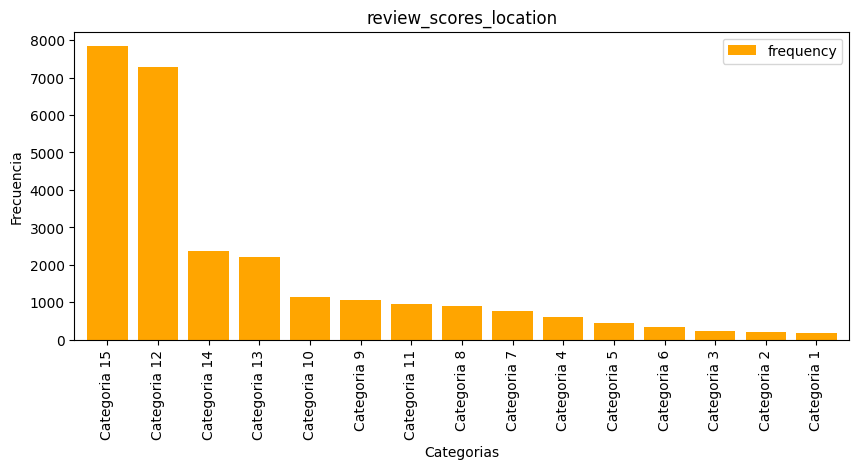

In [69]:
table_scores.plot(kind="bar", width=0.8, figsize=(10,4), color= "orange")
plt.title("review_scores_location")
plt.xlabel("Categorias")
plt.ylabel("Frecuencia")

review_scores_value

In [70]:
Mexico["review_scores_value"].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_value
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [71]:
#Obtenemos limite superior e inferior
Max_value= Mexico["review_scores_value"]. max()
Min_value= Mexico["review_scores_value"]. min()
Limites_value=[Min_value, Max_value]
Limites_value

[4.38, 5.0]

In [72]:
#Calculamos el RANGO
R_value= Max_value-Min_value
R_value


0.6200000000000001

In [73]:
#Calculamos el numero de intervalos de clase
ni_value= 1+3.32*np.log10(n)
ni_value

15.689631010177528

In [74]:
#Calculamos el ancho de los intervalos
i_value= R_value/ni_value
i_value

0.03951654437238322

In [75]:

#Categorizacion de variables
intervalos_value=np.linspace(Min_value, Max_value, 16)
intervalos_value

array([4.38      , 4.42133333, 4.46266667, 4.504     , 4.54533333,
       4.58666667, 4.628     , 4.66933333, 4.71066667, 4.752     ,
       4.79333333, 4.83466667, 4.876     , 4.91733333, 4.95866667,
       5.        ])

In [76]:
#Creamos las categorias
categorias_value= ["Categoria 1", "Categoria 2", "Categoria 3", 
                 "Categoria 4", "Categoria 5", "Categoria 6", 
                 "Categoria 7", "Categoria 8", "Categoria 9",
                 "Categoria 10", "Categoria 11","Categoria 12",
                 "Categoria 13", "Categoria 14", "Categoria 15"]

In [77]:
#Finalmente creamos las categorias en la columna numerica
Mexico["review_scores_value"]= pd.cut(x=Mexico["review_scores_value"], bins=intervalos_value, labels=categorias_value)
Mexico["review_scores_value"]

0         Categoria 8
1         Categoria 3
2        Categoria 13
3        Categoria 14
4        Categoria 11
             ...     
26577     Categoria 8
26578     Categoria 8
26579     Categoria 8
26580     Categoria 8
26581     Categoria 8
Name: review_scores_value, Length: 26582, dtype: category
Categories (15, object): ['Categoria 1' < 'Categoria 2' < 'Categoria 3' < 'Categoria 4' ... 'Categoria 12' < 'Categoria 13' < 'Categoria 14' < 'Categoria 15']

In [78]:
#obtengo analisis univariado de una variable categorica en especifico   

table_value=freq_tbl(Mexico["review_scores_value"])
table_value

,review_scores_value,frequency,percentage,cumulative_perc
0,Categoria 8,5524,0.207810,0.208398
1,Categoria 15,4664,0.175457,0.384351
2,Categoria 11,4111,0.154654,0.539442
3,Categoria 13,2051,0.077157,0.616818
4,Categoria 12,1913,0.071966,0.688988
5,Categoria 10,1683,0.063314,0.752480
6,Categoria 9,1544,0.058084,0.810729
7,Categoria 14,1465,0.055112,0.865998
8,Categoria 7,785,0.029531,0.895612
9,Categoria 6,706,0.026559,0.922247


In [79]:
#elimino las columnas ppercentage y cumulative perc para trabajar con las frecuencias
table_value= table_value.drop(["percentage","cumulative_perc"],axis=1)
table_value

,review_scores_value,frequency
0,Categoria 8,5524
1,Categoria 15,4664
2,Categoria 11,4111
3,Categoria 13,2051
4,Categoria 12,1913
5,Categoria 10,1683
6,Categoria 9,1544
7,Categoria 14,1465
8,Categoria 7,785
9,Categoria 6,706


In [80]:
#ajusto indice de mi dataframe
table_value= table_value.set_index('review_scores_value')
table_value

,frequency
review_scores_value,
Categoria 8,5524
Categoria 15,4664
Categoria 11,4111
Categoria 13,2051
Categoria 12,1913
Categoria 10,1683
Categoria 9,1544
Categoria 14,1465
Categoria 7,785


Text(0, 0.5, 'Frecuencia')

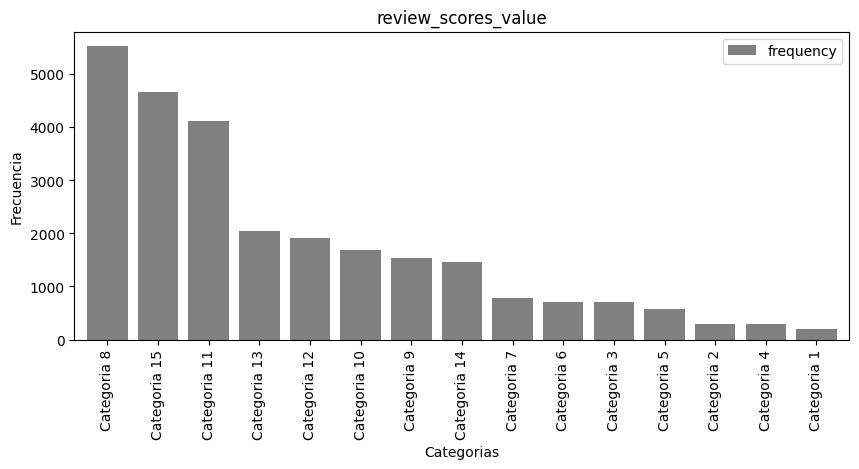

In [81]:
table_value.plot(kind="bar", width=0.8, figsize=(10,4), color= "gray")
plt.title("review_scores_value")
plt.xlabel("Categorias")
plt.ylabel("Frecuencia")

reviews_per_month

In [124]:
Mexico["reviews_per_month"].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [125]:
#Obtenemos limite superior e inferior
Max_reviews_per_month = Mexico["reviews_per_month"].max()
Min_reviews_per_month = Mexico["reviews_per_month"].min()
Limites_reviews_per_month = [Min_reviews_per_month, Max_reviews_per_month]
Limites_reviews_per_month

[0.01, 4.72]

In [126]:
# Calculamos el RANGO para "reviews_per_month"
R_reviews_per_month = Max_reviews_per_month - Min_reviews_per_month
R_reviews_per_month

4.71

In [127]:
# Calculamos el número de intervalos de clase para "reviews_per_month"
ni_reviews_per_month = 1 + 3.32 * np.log10(n)
ni_reviews_per_month

15.689631010177528

In [128]:
# Calculamos el ancho de los intervalos para "reviews_per_month"
i_reviews_per_month = R_reviews_per_month / ni_reviews_per_month
i_reviews_per_month

0.3001982645063306

In [129]:
# Categorización de la variable "reviews_per_month"
intervalos_reviews_per_month = np.linspace(Min_reviews_per_month, Max_reviews_per_month, 16)
intervalos_reviews_per_month

array([0.01 , 0.324, 0.638, 0.952, 1.266, 1.58 , 1.894, 2.208, 2.522,
       2.836, 3.15 , 3.464, 3.778, 4.092, 4.406, 4.72 ])

In [130]:
# Creamos las categorías para "reviews_per_month"
categorias_reviews_per_month = ["Categoria 1", "Categoria 2", "Categoria 3", 
                                "Categoria 4", "Categoria 5", "Categoria 6", 
                                "Categoria 7", "Categoria 8", "Categoria 9",
                                "Categoria 10", "Categoria 11", "Categoria 12",
                                "Categoria 13", "Categoria 14", "Categoria 15"]

In [131]:
#Finalmente creamos las categorias en la columna numerica
Mexico["reviews_per_month"]= pd.cut(x=Mexico["reviews_per_month"], bins=intervalos_reviews_per_month, labels=categorias_reviews_per_month)
Mexico["reviews_per_month"]

0        Categoria 4
1        Categoria 2
2        Categoria 1
3        Categoria 3
4        Categoria 1
            ...     
26577    Categoria 4
26578    Categoria 4
26579    Categoria 4
26580    Categoria 4
26581    Categoria 4
Name: reviews_per_month, Length: 26582, dtype: category
Categories (15, object): ['Categoria 1' < 'Categoria 2' < 'Categoria 3' < 'Categoria 4' ... 'Categoria 12' < 'Categoria 13' < 'Categoria 14' < 'Categoria 15']

In [132]:
#obtengo analisis univariado de una variable categorica en especifico   

table_reviews_per_month=freq_tbl(Mexico["reviews_per_month"])
table_reviews_per_month

,reviews_per_month,frequency,percentage,cumulative_perc
0,Categoria 4,5771,0.217102,0.217642
1,Categoria 1,4634,0.174328,0.392405
2,Categoria 5,3052,0.114815,0.507505
3,Categoria 2,2937,0.110488,0.618268
4,Categoria 3,2309,0.086863,0.705348
5,Categoria 7,1314,0.049432,0.754903
6,Categoria 6,1310,0.049281,0.804307
7,Categoria 8,1087,0.040892,0.845301
8,Categoria 9,893,0.033594,0.878979
9,Categoria 10,848,0.031901,0.910959


In [133]:
#elimino las columnas ppercentage y cumulative perc para trabajar con las frecuencias
table_reviews_per_month= table_reviews_per_month.drop(["percentage","cumulative_perc"],axis=1)
table_reviews_per_month

,reviews_per_month,frequency
0,Categoria 4,5771
1,Categoria 1,4634
2,Categoria 5,3052
3,Categoria 2,2937
4,Categoria 3,2309
5,Categoria 7,1314
6,Categoria 6,1310
7,Categoria 8,1087
8,Categoria 9,893
9,Categoria 10,848


In [137]:
#ajusto indice de mi dataframe
table_reviews_per_month= table_reviews_per_month.set_index("reviews_per_month")
table_reviews_per_month

,frequency
reviews_per_month,
Categoria 4,5771
Categoria 1,4634
Categoria 5,3052
Categoria 2,2937
Categoria 3,2309
Categoria 7,1314
Categoria 6,1310
Categoria 8,1087
Categoria 9,893


Text(0, 0.5, 'Frecuencia')

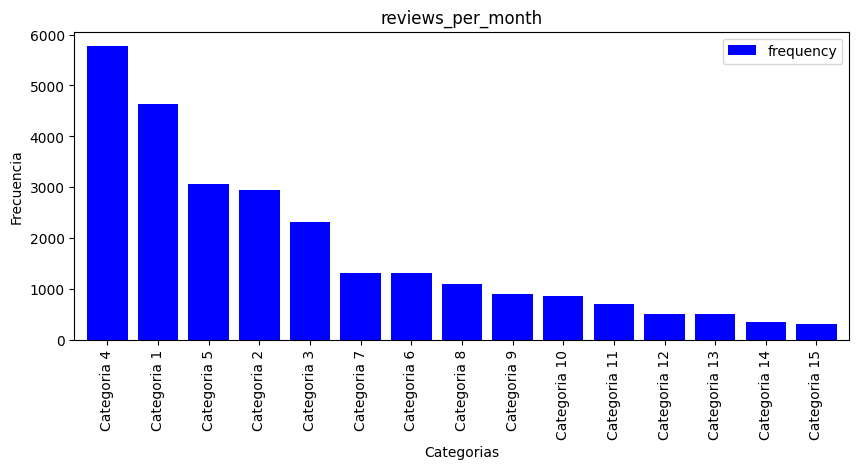

In [138]:
table_reviews_per_month.plot(kind="bar", width=0.8, figsize=(10,4), color= "blue")
plt.title("reviews_per_month")
plt.xlabel("Categorias")
plt.ylabel("Frecuencia")

review_scores_communication

In [139]:
Mexico["review_scores_communication"].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_communication
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [140]:
#Obtenemos limite superior e inferior
Max_review_scores_communication = Mexico["review_scores_communication"].max()
Min_review_scores_communication = Mexico["review_scores_communication"].min()
Limites_review_scores_communication = [Min_review_scores_communication, Max_review_scores_communication]
Limites_review_scores_communication

[4.58, 5.0]

In [141]:
# Calculamos el RANGO para "reviews_per_month"
R_review_scores_communication = Max_review_scores_communication - Min_review_scores_communication
R_review_scores_communication

0.41999999999999993

In [142]:
ni_review_scores_communication=1+3.32*np.log10(n)
ni_review_scores_communication

15.689631010177528

In [144]:
intervalos_review_scores_communication=np.linspace(Min_review_scores_communication, Max_review_scores_communication, 16)
intervalos_review_scores_communication

array([4.58 , 4.608, 4.636, 4.664, 4.692, 4.72 , 4.748, 4.776, 4.804,
       4.832, 4.86 , 4.888, 4.916, 4.944, 4.972, 5.   ])

In [145]:
# Creamos las categorías para "reviews_per_month"
categorias_review_scores_communication = ["Categoria 1", "Categoria 2", "Categoria 3", 
                                "Categoria 4", "Categoria 5", "Categoria 6", 
                                "Categoria 7", "Categoria 8", "Categoria 9",
                                "Categoria 10", "Categoria 11", "Categoria 12",
                                "Categoria 13", "Categoria 14", "Categoria 15"]

In [146]:
#Finalmente creamos las categorias en la columna numerica
Mexico["review_scores_communication"]= pd.cut(x=Mexico["review_scores_communication"], bins=intervalos_review_scores_communication, labels=categorias_review_scores_communication)
Mexico["review_scores_communication"]

0        Categoria 12
1         Categoria 8
2        Categoria 13
3        Categoria 15
4         Categoria 6
             ...     
26577    Categoria 12
26578    Categoria 12
26579    Categoria 12
26580    Categoria 12
26581    Categoria 12
Name: review_scores_communication, Length: 26582, dtype: category
Categories (15, object): ['Categoria 1' < 'Categoria 2' < 'Categoria 3' < 'Categoria 4' ... 'Categoria 12' < 'Categoria 13' < 'Categoria 14' < 'Categoria 15']

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


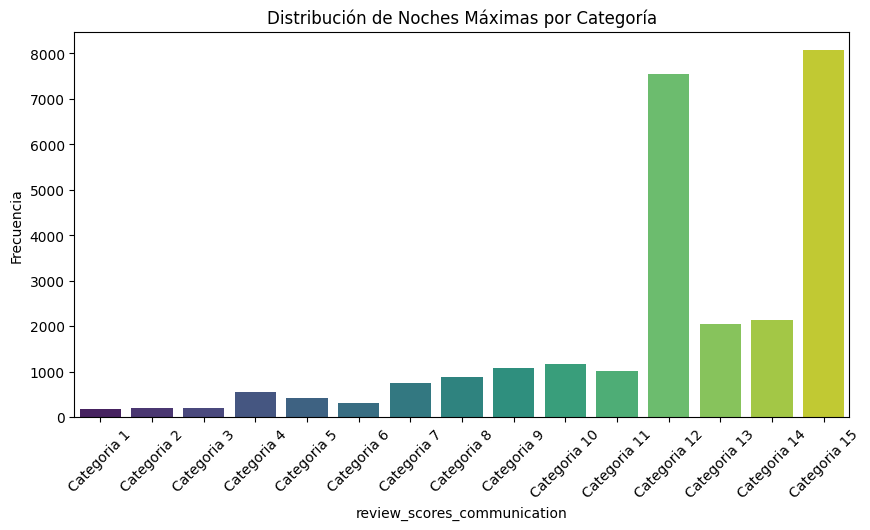

In [152]:
review_scores_communication = Mexico['review_scores_communication'].value_counts().sort_index()

# Crear el histograma (gráfico de barras)
plt.figure(figsize=(10, 5))
sns.barplot(x=review_scores_communication.index, y=review_scores_communication.values, palette="viridis")

# Personalizar el gráfico
plt.xlabel('review_scores_communication')
plt.ylabel('Frecuencia')
plt.title('Distribución de Noches Máximas por Categoría')
plt.xticks(rotation=45)  # Girar etiquetas para mejor visibilidad
plt.show()

review_scores_checkin

In [170]:

Mexico["review_scores_checkin"].info()
n=26582


<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_checkin
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [171]:
Max_review_scores_checkin=Mexico['review_scores_checkin'].max()
Min_review_scores_checkin=Mexico['review_scores_checkin'].min()
review_scores_checkin=[Min_review_scores_checkin, Max_review_scores_checkin]
review_scores_checkin

[4.6, 5.0]

In [172]:
R_review_scores_checkin=Max_review_scores_checkin-Min_review_scores_checkin
R_review_scores_checkin

0.40000000000000036

In [173]:
ni_review_scores_checkin=1+3.32*np.log10(n)
ni_review_scores_checkin

15.689631010177528

In [174]:
intervalos_review_scores_checkin=np.linspace(Min_review_scores_checkin, Max_review_scores_checkin, 16)
intervalos_review_scores_checkin

array([4.6       , 4.62666667, 4.65333333, 4.68      , 4.70666667,
       4.73333333, 4.76      , 4.78666667, 4.81333333, 4.84      ,
       4.86666667, 4.89333333, 4.92      , 4.94666667, 4.97333333,
       5.        ])

In [175]:
categorias_review_scores_checkin = ["Categoria 1", "Categoria 2", "Categoria 3", 
                                "Categoria 4", "Categoria 5", "Categoria 6", 
                                "Categoria 7", "Categoria 8", "Categoria 9",
                                "Categoria 10", "Categoria 11", "Categoria 12",
                                "Categoria 13", "Categoria 14", "Categoria 15"]

In [176]:
Mexico['review_scores_checkin']=pd.cut(Mexico['review_scores_checkin'],bins=intervalos_review_scores_checkin,labels=categorias_review_scores_checkin)
Mexico['review_scores_checkin']

0        Categoria 12
1        Categoria 11
2        Categoria 13
3        Categoria 14
4        Categoria 15
             ...     
26577    Categoria 12
26578    Categoria 12
26579    Categoria 12
26580    Categoria 12
26581    Categoria 12
Name: review_scores_checkin, Length: 26582, dtype: category
Categories (15, object): ['Categoria 1' < 'Categoria 2' < 'Categoria 3' < 'Categoria 4' ... 'Categoria 12' < 'Categoria 13' < 'Categoria 14' < 'Categoria 15']

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


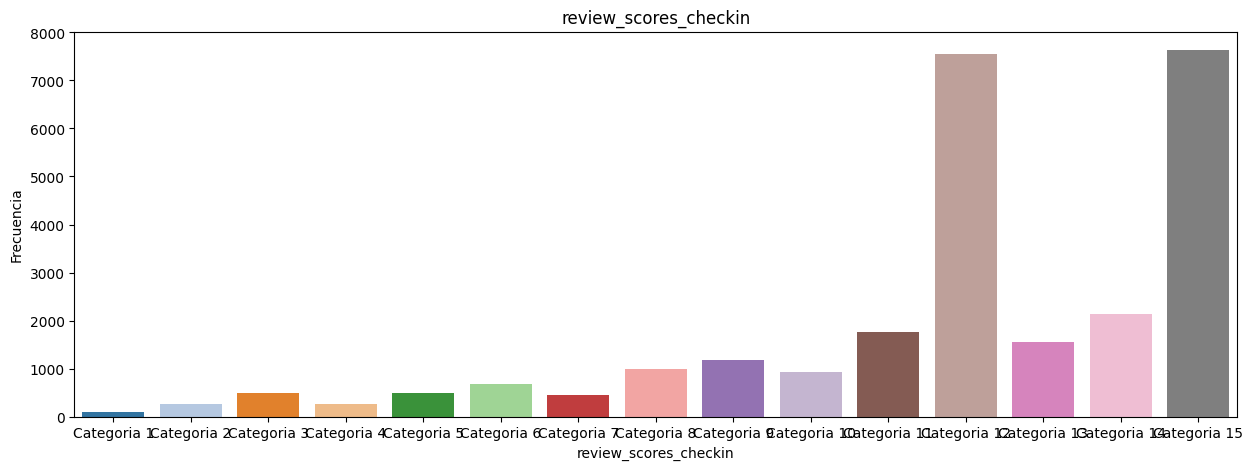

In [180]:
review_scores_checkin = Mexico['review_scores_checkin'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(15, 5))
sns.barplot(x=review_scores_checkin.index, y=review_scores_checkin.values, palette="tab20")

# Personalizar el gráfico
plt.xlabel('review_scores_checkin')
plt.ylabel('Frecuencia')
plt.title('review_scores_checkin')
plt.show()

review_scores_cleanliness

In [208]:


Mexico["review_scores_cleanliness"].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_cleanliness
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [209]:
Max_review_scores_cleanliness=Mexico['review_scores_cleanliness'].max()
Min_review_scores_cleanliness=Mexico['review_scores_cleanliness'].min()
review_scores_cleanliness=[Min_review_scores_cleanliness, Max_review_scores_cleanliness]
review_scores_cleanliness

[4.43, 5.0]

In [210]:
R_review_scores_cleanliness=Max_review_scores_cleanliness-Min_review_scores_cleanliness
R_review_scores_cleanliness

0.5700000000000003

In [211]:
ni_review_scores_cleanliness=1+3.32*np.log10(n)
ni_review_scores_cleanliness

15.689631010177528

In [213]:
intervalos_review_scores_cleanliness=np.linspace(Min_review_scores_cleanliness, Max_review_scores_cleanliness, 16)
intervalos_review_scores_cleanliness

array([4.43 , 4.468, 4.506, 4.544, 4.582, 4.62 , 4.658, 4.696, 4.734,
       4.772, 4.81 , 4.848, 4.886, 4.924, 4.962, 5.   ])

In [214]:
categorias_review_scores_cleanliness = ["Categoria 1", "Categoria 2", "Categoria 3", 
                                "Categoria 4", "Categoria 5", "Categoria 6", 
                                "Categoria 7", "Categoria 8", "Categoria 9",
                                "Categoria 10", "Categoria 11", "Categoria 12",
                                "Categoria 13", "Categoria 14", "Categoria 15"]

In [215]:
Mexico['review_scores_cleanliness']=pd.cut(Mexico['review_scores_cleanliness'],bins=intervalos_review_scores_cleanliness,labels=categorias_review_scores_cleanliness)
Mexico['review_scores_cleanliness']

0        Categoria 10
1         Categoria 8
2         Categoria 9
3        Categoria 14
4        Categoria 15
             ...     
26577    Categoria 10
26578    Categoria 10
26579    Categoria 10
26580    Categoria 10
26581    Categoria 10
Name: review_scores_cleanliness, Length: 26582, dtype: category
Categories (15, object): ['Categoria 1' < 'Categoria 2' < 'Categoria 3' < 'Categoria 4' ... 'Categoria 12' < 'Categoria 13' < 'Categoria 14' < 'Categoria 15']

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


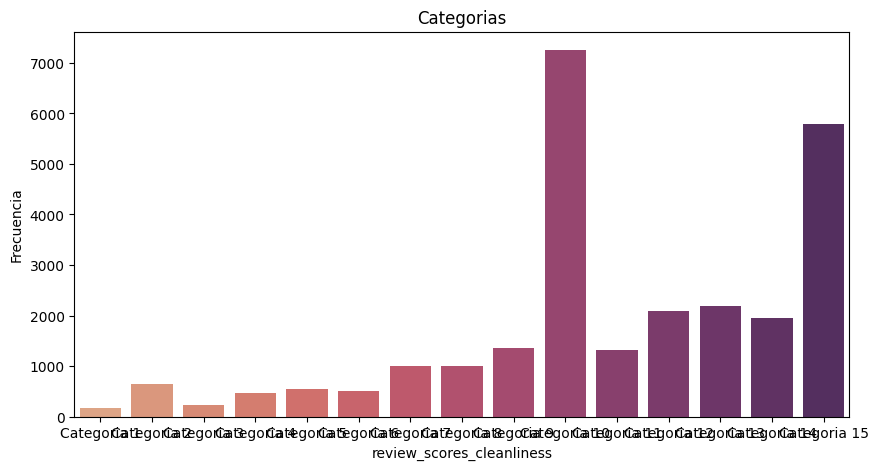

In [218]:
conteo_cleanliness = Mexico['review_scores_cleanliness'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_cleanliness.index, y=conteo_cleanliness.values, palette="flare")

# Personalizar el gráfico
plt.xlabel('review_scores_cleanliness')
plt.ylabel('Frecuencia')
plt.title('Categorias')
plt.show()

review_scores_accuracy

In [219]:
Mexico["review_scores_accuracy"].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_accuracy
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [220]:
Max_review_scores_accuracy=Mexico['review_scores_accuracy'].max()
Min_review_scores_accuracy=Mexico['review_scores_accuracy'].min()
review_scores_accuracy=[Min_review_scores_accuracy, Max_review_scores_accuracy]
review_scores_accuracy

[4.52, 5.0]

In [221]:
R_review_scores_accuracy = Max_review_scores_accuracy - Min_review_scores_accuracy
R_review_scores_accuracy

0.4800000000000004

In [222]:
ni_review_scores_accuracy=1+3.32*np.log10(n)
ni_review_scores_accuracy

15.689631010177528

In [224]:
intervalos_review_scores_accuracy=np.linspace(Min_review_scores_accuracy, Max_review_scores_accuracy, 16)
intervalos_review_scores_accuracy

array([4.52 , 4.552, 4.584, 4.616, 4.648, 4.68 , 4.712, 4.744, 4.776,
       4.808, 4.84 , 4.872, 4.904, 4.936, 4.968, 5.   ])

In [225]:
categorias_review_scores_accuracy = ["Categoria 1", "Categoria 2", "Categoria 3", 
                                "Categoria 4", "Categoria 5", "Categoria 6", 
                                "Categoria 7", "Categoria 8", "Categoria 9",
                                "Categoria 10", "Categoria 11", "Categoria 12",
                                "Categoria 13", "Categoria 14", "Categoria 15"]

In [226]:
Mexico['review_scores_accuracy']=pd.cut(Mexico['review_scores_accuracy'],bins=intervalos_review_scores_accuracy,labels=categorias_review_scores_accuracy)
Mexico['review_scores_accuracy']

0        Categoria 12
1         Categoria 2
2        Categoria 10
3        Categoria 12
4        Categoria 15
             ...     
26577    Categoria 12
26578    Categoria 12
26579    Categoria 12
26580    Categoria 12
26581    Categoria 12
Name: review_scores_accuracy, Length: 26582, dtype: category
Categories (15, object): ['Categoria 1' < 'Categoria 2' < 'Categoria 3' < 'Categoria 4' ... 'Categoria 12' < 'Categoria 13' < 'Categoria 14' < 'Categoria 15']

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


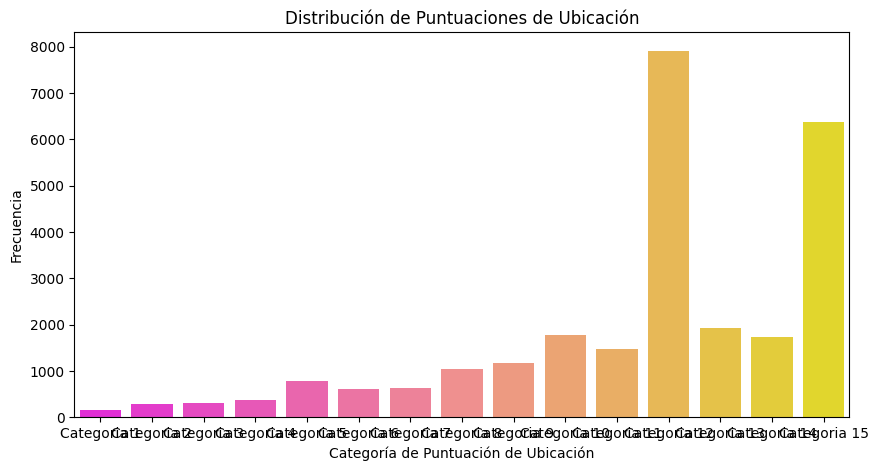

In [228]:
conteo_accuracy = Mexico['review_scores_accuracy'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_accuracy.index, y=conteo_accuracy.values, palette="spring")

# Personalizar el gráfico
plt.xlabel('Categoría de Puntuación de Ubicación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntuaciones de Ubicación')
plt.show()